# PNEUMONIA DETECTION USING ARTIFICIAL INTELLIGENCE

### dataset -->  https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab Notebooks/chest_xray2/train/'
valid_path = '/content/drive/My Drive/Colab Notebooks/chest_xray2/test/'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE +[3] , weights='imagenet', include_top=False)




58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/chest_xray2/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/chest_xray2/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2731 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/chest_xray2/test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 380 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
86/86 [==============================] - 1414s 16s/step - loss: 0.2142 - accuracy: 0.9037 - val_loss: 0.0693 - val_accuracy: 0.9132
Epoch 2/5
86/86 [==============================] - 65s 761ms/step - loss: 0.0990 - accuracy: 0.9597 - val_loss: 0.1314 - val_accuracy: 0.9184
Epoch 3/5
86/86 [==============================] - 72s 841ms/step - loss: 0.0863 - accuracy: 0.9659 - val_loss: 0.4098 - val_accuracy: 0.9026
Epoch 4/5
86/86 [==============================] - 72s 841ms/step - loss: 0.0707 - accuracy: 0.9751 - val_loss: 0.1089 - val_accuracy: 0.9105
Epoch 5/5
86/86 [==============================] - 72s 842ms/step - loss: 0.0826 - accuracy: 0.9667 - val_loss: 0.4682 - val_accuracy: 0.8789


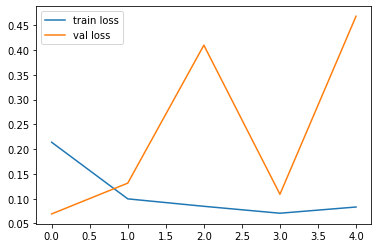

<Figure size 432x288 with 0 Axes>

In [ ]:
#import matplotlib.pyplot as plt
#plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


In [ ]:

# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
model=load_model('model_vgg16.h5')
img = image.load_img('/content/drive/My Drive/Colab Notebooks/chest_xray2/val/PNEUMONIA/person1946_bacteria_4874.jpeg', target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
classes

array([[0., 1.]], dtype=float32)